In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
p = np.random.randn(5, 5)
np.power(p, 2)
np.random.randn(1)

array([-1.23386192])

In [15]:
def hmc(U, gradU, m, dt, nstep, x, mhtest):
    p = np.random.randn(len(x), len(x)) * np.sqrt(m)
    oldX = x
    oldEnergy = np.transpose(p) * m * p / 2 + U(x)
    for i in range(nstep):
        p = p - gradU(x) * dt / 2
        x = x + p/m * dt
        p = p - gradU(x) * dt / 2
    p=-p
    if mhtest != 0:
        newEnergy = np.transpose(p) * m * p / 2 + U(x)
        if np.exp(oldEnergy - newEnergy) < np.random.uniform(size=1):
            x = oldX
    newx = x
    return(newx)

In [16]:
def sghmc(U, gradU, m, dt, nstep, x, C, V):
    p = np.random.randn(len(x), len(x)) * np.sqrt(m)
    B = 0.5 * V * dt
    D = np.sqrt(2 * (C-B) * dt)
    for i in range(nstep):
        p = p - gradU(x) * dt - p * C * dt + np.random.randn(1) * D
        x = x + p/m * dt
    newx = x
    return(newx)

In [28]:
nsample = 10000
xStep = 0.1
m = 1
C = 3
dt = 0.1
nstep = 50
V = 4

In [29]:
U = lambda x: -2 * np.power(x, 2) + np.power(x, 4)
gradU = lambda x: (-4 * x +  4 * np.power(x, 3)) +  np.random.randn(1) * 2;
gradUPerfect = lambda x: -4 * x +  4 * np.power(x, 3) 

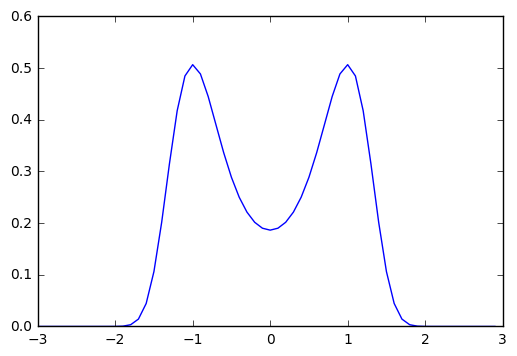

In [30]:
xGrid = np.arange(-3, 3, 0.1)
y_true = np.exp(-U(xGrid))
y_true = y_true/sum(y_true)/xStep
plt.plot(xGrid, y_true)

In [31]:
# wo noise, w mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 1)
    samples[i] = x
yhmc1, xhmc1 = np.histogram(samples, xGrid)
xhmc1 = 0.5*(xhmc1[1:]+xhmc1[:-1])
yhmc1 = yhmc1/sum(yhmc1)/xStep

In [32]:
# wo noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 0)
    samples[i] = x
yhmc2, xhmc2 = np.histogram(samples, xGrid)
xhmc2 = 0.5*(xhmc2[1:]+xhmc2[:-1])
yhmc2 = yhmc2/sum(yhmc2)/xStep

In [33]:
# w noise, w mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 1)
    samples[i] = x
yhmc3, xhmc3 = np.histogram(samples, xGrid)
xhmc3 = 0.5*(xhmc3[1:]+xhmc3[:-1])
yhmc3 = yhmc3/sum(yhmc3)/xStep

In [34]:
# w noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 0)
    samples[i] = x
yhmc4, xhmc4 = np.histogram(samples, xGrid)
xhmc4 = 0.5*(xhmc4[1:]+xhmc4[:-1])
yhmc4 = yhmc4/sum(yhmc4)/xStep

In [35]:
# w noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = sghmc(U, gradU, m, dt, nstep, x, C, V)
    samples[i] = x
yhmc5, xhmc5 = np.histogram(samples, xGrid)
xhmc5 = 0.5*(xhmc5[1:]+xhmc5[:-1])
yhmc5 = yhmc5/sum(yhmc5)/xStep

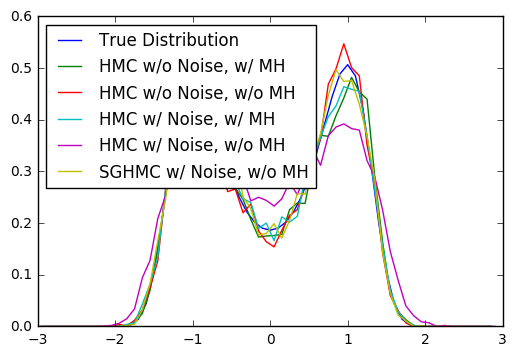

In [56]:
true = plt.plot(xGrid, y_true, label = 'True Distribution')
plot1 = plt.plot(xhmc1, yhmc1, label = 'HMC w/o Noise, w/ MH')
plot2 = plt.plot(xhmc2, yhmc2, label = 'HMC w/o Noise, w/o MH')
plot3 = plt.plot(xhmc3, yhmc3, label = 'HMC w/ Noise, w/ MH')
plot4 = plt.plot(xhmc4, yhmc4, label = 'HMC w/ Noise, w/o MH')
plot5 = plt.plot(xhmc5, yhmc5, label = 'SGHMC w/ Noise, w/o MH')
plt.legend(loc='upper left')
pass

In [ ]:
U = lambda x: 0.5 * np.power(x, 2)
gradU = lambda x: x + np.random.randn(1) * 2;
gradUPerfect = lambda x: x

In [ ]:
xGrid = np.arange(-3, 3, 0.1)
y = np.exp(-U(xGrid))
y = y/sum(y)/xStep
plt.plot(xGrid, y)

In [ ]:
# wo noise, w mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 1)
    samples[i] = x
plt.hist(samples)
pass

In [ ]:
# wo noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 10)
    samples[i] = x
plt.hist(samples)
pass

In [ ]:
# w noise, w mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 1)
    samples[i] = x
plt.hist(samples)
pass

In [ ]:
# w noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 0)
    samples[i] = x
plt.hist(samples)
pass

In [ ]:
# w noise, no mh
samples = np.zeros((nsample, 1))
x = np.zeros((1, 1))
for i in range(nsample):
    x = sghmc(U, gradU, m, dt, nstep, x, C, V)
    samples[i] = x
plt.hist(samples)
pass